In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('merged.csv')


C:\Users\abidi\AppData\Local\Temp\ipykernel_18724\2637363864.py:1: DtypeWarning: Columns (24,25,26,28,29,30,33,34,35,36,37,39,40,41,42,43,44,50,52,53,54,57,58,59,60,64,65,66,74,75,76,77,78,80,84,87,91,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,254,255,259,260,266,273,274,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,302,303,304,305,306,307,308,309,310,311,312,313,314,316,317,318,319,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,368,369,381,385,397,404,420,421,422

In [ ]:
df.head()

In [ ]:
df.shape

(30587, 674)

In [ ]:
null=df['Description'].isnull().sum()
null

5557

In [ ]:
null=df['Summary'].isnull().sum()
null


0

In [ ]:
num_duplicates = df['Summary'].duplicated().sum()
print("Number of duplicated rows:", num_duplicates)


Number of duplicated rows: 1837


In [ ]:
df=df.drop_duplicates(subset=['Summary'])
df.shape

(28750, 674)

In [ ]:
for i in df.columns:
  print(i)

In [ ]:
for i in df['Summary']:
  print('le resume est           ',i)

In [ ]:
for i in df['Description']:
  print('la decription est           ',i)

In [ ]:
#est ce que la similarity est basé sur el summary ou la description
null=df['Description'].isnull().sum()
null


5371

In [ ]:
df.head()

In [ ]:
df['Status'].unique()

In [ ]:
df = df[df['Status'].isin(['Closed', 'Resolved'])]
df.shape



(20042, 674)

In [ ]:
df['Issue Type'].value_counts()

Bug                     8012
Task                    4647
Improvement             3595
New Feature             1359
Customer New Request    1202
Story                    522
Sub-task                 353
Patch                    230
Remove Feature            47
Epic                      27
Deprecation               25
Request                   12
Sub-Task                   7
Test                       2
Wish                       1
Proposal                   1
Name: Issue Type, dtype: int64

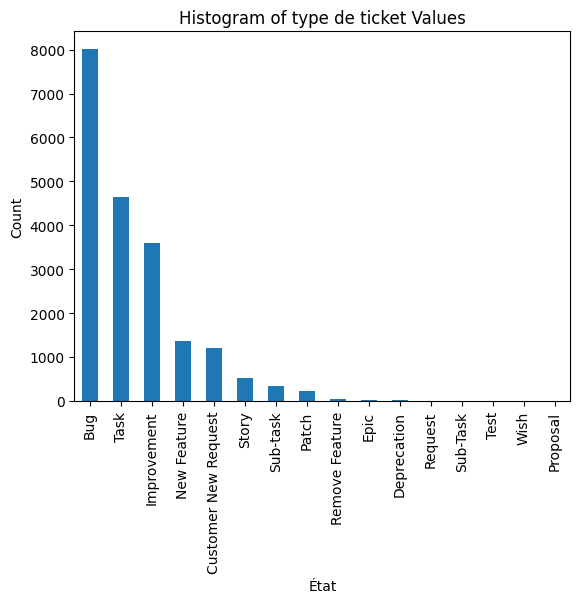

In [ ]:
import matplotlib.pyplot as plt

# Get the count of each unique value in the 'État' column
etat_value_counts = df['Issue Type'].value_counts()

# Plotting the histogram
etat_value_counts.plot(kind='bar')
plt.title('Histogram of type de ticket Values')
plt.xlabel('État')
plt.ylabel('Count')
plt.show()


In [ ]:
for i in df.columns :
  print(i)

In [ ]:
commentaires = ['Comment', 'Comment.1', 'Comment.2', 'Comment.3', 'Comment.4', 'Comment.5', 'Comment.6', 'Comment.7', 'Comment.8', 'Comment.9', 'Comment.10', 'Comment.11', 'Comment.12', 'Comment.13', 'Comment.14', 'Comment.15', 'Comment.16', 'Comment.17', 'Comment.18', 'Comment.19', 'Comment.20', 'Comment.21', 'Comment.22', 'Comment.23', 'Comment.24', 'Comment.25', 'Comment.26', 'Comment.27', 'Comment.28', 'Comment.29', 'Comment.30', 'Comment.31', 'Comment.32', 'Comment.33', 'Comment.34', 'Comment.35', 'Comment.36', 'Comment.37', 'Comment.38', 'Comment.39', 'Comment.40', 'Comment.41', 'Comment.42', 'Comment.43', 'Comment.44', 'Comment.45', 'Comment.46', 'Comment.47', 'Comment.48', 'Comment.49', 'Comment.50', 'Comment.51', 'Comment.52', 'Comment.53', 'Comment.54', 'Comment.55', 'Comment.56', 'Comment.57', 'Comment.58']
comm = df[commentaires].copy()
comm.head(50)

In [ ]:
# Keep rows that have at least one non-null value in each column
comm_with_non_nulls = comm.dropna(how='all')

# df_with_non_nulls now contains only rows with at least one non-null value in each column



In [ ]:
comm_with_non_nulls .shape

(10334, 59)

In [ ]:
comm=comm_with_non_nulls
comm.head(20)

In [ ]:
pp= ['Environment','Summary','Description']
ppl = df[pp].copy()
ppl.head(50)

In [ ]:
merged_df = comm.merge(ppl, left_index=True, right_index=True)

In [ ]:
merged_df.shape
merged_df.head(30)


In [ ]:
for i in merged_df['Comment']:
  print('le commentaire est   ',i)


In [ ]:
type(merged_df['Comment'])


In [ ]:
merged_df['Comment'] = merged_df['Comment'].astype(str)
merged_df['Comment'] = merged_df['Comment'].str.split(';').str[-1]


In [ ]:
for i in merged_df['Comment']:
  print('ce commentaire est            ',i)

In [ ]:
for i in range(1, 58):  # Loop through Comment.1 to Comment.57
    col_name = f'Comment.{i}'
    merged_df[col_name] = merged_df[col_name].astype(str)
    merged_df[col_name] = merged_df[col_name].str.split(';').str[-1]
    print(f"le commentaire.{i} est ", merged_df[col_name])


 Using Sbert (Sentence Bert)texte en gras using transformers architecture


In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util



In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")


In [ ]:
embeddings = []

# Iterate through each row of the column
for i in merged_df['Summary']:
    # Encode the sentence using the BERT model
    embedding = model.encode(i)
    # Append the embedding to the list
    embeddings.append(embedding)

merged_df['embeddingsSummary'] = embeddings


In [ ]:

merged_df.head(20)



In [ ]:

merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

In [ ]:
embeddings2 = merged_df.loc[1, 'embeddingsSummary']
embeddings1= merged_df.loc[0, 'embeddingsSummary']
embeddings2


In [ ]:
embeddings1




In [ ]:
len(embeddings1)

384

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between embeddings1 and embeddings2
similarity_matrix = cosine_similarity(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))

# Access the similarity value from the similarity matrix
cosine_similarity_value = similarity_matrix[0][0]

print("Summary 1:", merged_df.loc[0, 'Summary'])
print("Summary 2:", merged_df.loc[1, 'Summary'])
print("Cosine Similarity:", cosine_similarity_value)




Summary 1: plugin config-import not found for jfrog Artifactory cloud implementation
Summary 2: RTDEV-5069 / mirroring https://asset-packagist.org
Cosine Similarity: 0.04485318


In [ ]:
summary_utilisateur=str(input('Tapez le résumé du probème que vous rencontrez         '))
while summary_utilisateur == '':
  summary_utilisateur=str(input('Tapez le résumé du probème que vous rencontrez         '))





Tapez le résumé du probème que vous rencontrez         python error


In [ ]:
embeddingsu=model.encode(summary_utilisateur)

In [ ]:
import numpy as np

# Create an empty array with the appropriate shape and data type
embeddings_summary = np.empty((len(merged_df),), dtype=object)

# Populate the array with values from the 'embeddingsSummary' column
for i in merged_df.index:
    embeddings_summary[i] = merged_df.loc[i, 'embeddingsSummary']


In [ ]:
# Ensure embeddingsu is a 1D numpy array or reshape it accordingly
embeddingsu = embeddingsu.reshape(1, -1)



In [ ]:
for i in range(len(embeddings_summary)):
    similarity_matrix = cosine_similarity(embeddings_summary[i].reshape(1, -1), embeddingsu)
    cosine_similarity_value = similarity_matrix[0][0]
    if cosine_similarity_value >= 0.5:
        summary_text = merged_df.loc[i, 'Summary']
        print(f"Similarity between '{summary_text}' and '{summary_utilisateur}': {cosine_similarity_value}")

Similarity between 'plpy import problems' and 'python error': 0.545191764831543
Similarity between 'm4 keyword conflict with python' and 'python error': 0.5259153842926025
Similarity between 'compile error' and 'python error': 0.5202348232269287
Similarity between 'error in function' and 'python error': 0.6073518991470337
Similarity between 'Error' and 'python error': 0.6749846339225769


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
vectorizer = TfidfVectorizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
all_tokens=[]
for i in df['Summary']:
  tokens = nltk.word_tokenize(i)
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  tokens = [token for token in tokens if token not in stop_words]
  print(tokens)
  all_tokens.append(tokens)







In [ ]:
len(all_tokens)





In [ ]:
empty_lists = [sublist for sublist in all_tokens if len(sublist) == 0]


if empty_lists:
    print("The following lists are empty:")
    for i, sublist in enumerate(empty_lists):
        print(f"List {i + 1}: {sublist}")
else:
    print("There are no empty lists.")

In [ ]:
for i in reversed(all_tokens):
    if len(i) == 0:
        all_tokens.remove(i)
len(all_tokens)



20040

In [ ]:
all_tokens[:10]







In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()


vectorizer.fit([" ".join(tokens) for tokens in all_tokens])

tokens1 = all_tokens[:1]
print(tokens1)
text = " ".join(tokens1[0])
matrice = vectorizer.transform([text])
print(matrice)

[['plugin', 'config-import', 'found', 'jfrog', 'Artifactory', 'cloud', 'implementation']]
  (0, 7968)	0.30297671516658375
  (0, 6017)	0.4171709560509621
  (0, 5295)	0.3392869543879732
  (0, 5281)	0.3252472478172802
  (0, 4240)	0.3527050674883263
  (0, 2154)	0.3605222812846478
  (0, 1914)	0.444894161917785
  (0, 906)	0.24690908978944343


In [ ]:
tokens2= all_tokens[1:2]
print(tokens2) # Get the first list of tokens
text = " ".join(tokens2[0])  # Join the tokens into a single string
matrice2 = vectorizer.transform([text])
print(matrice2)

[['UI', 'Native', 'return', '404', 'Artifacts', 'Cached', 'Remote', 'Repositories']]
  (0, 10791)	0.31567736409952385
  (0, 8987)	0.28560136174448547
  (0, 8857)	0.4149430587092495
  (0, 8777)	0.2799424232886415
  (0, 7119)	0.33333425625657925
  (0, 1585)	0.39579954260803
  (0, 914)	0.4109220802192971
  (0, 237)	0.36277844657939684


In [ ]:
cosine_sim = cosine_similarity(matrice, matrice2)
round_cosine=round(cosine_sim[0][0], 2)



print(round_cosine)

0.0


In [ ]:
matrices = []

for tokens in all_tokens:
    # Join the tokens into a single string
    text = " ".join(tokens)

    # Apply the vectorizer to the text
    matrice = vectorizer.transform([text])

    # Append the resulting matrix to the list of matrices
    matrices.append(matrice)

# Print the list of matrices
for i, matrice in enumerate(matrices):
    print(f"Matrix {i+1}:")
    print(matrice)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all pairs of matrices
cosine_similarities = []
for i in range(len(matrices)):
    for j in range(i+1, len(matrices)):
        cosine_sim = cosine_similarity(matrices[i], matrices[j])
        cosine_similarities.append((i, j, cosine_sim[0][0]))

# Print cosine similarities
for i, j, sim in cosine_similarities:
    print(f"Cosine similarity between matrix {i+1} and matrix {j+1}: {sim}")
